In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import smogn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.cluster import KMeans
import shap

In [48]:
dataset = pd.read_csv("dataset/merged_data.csv", low_memory=False)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Columns: 102 entries, nomem_encr to work_impact_of_health
dtypes: float64(56), int64(46)
memory usage: 3.7 MB


In [49]:
# Checking missing values
dataset.replace(' ', np.nan, inplace=True)
print('Overall missing values: ', dataset.isnull().sum().sum())

Overall missing values:  0


In [50]:
# Checking datatypes
print(dataset.dtypes.to_string())

nomem_encr                              int64
swls_score                            float64
extraversion                          float64
agreeableness                         float64
conscientiousness                     float64
emotional_stability                   float64
intellect_imagination                 float64
leisure_time_satisfaction             float64
theatre                                 int64
cabaret                                 int64
dance_performance                       int64
classical_concert                       int64
opera                                   int64
musical                                 int64
pop_festival                            int64
house_party                             int64
museum                                  int64
art_gallery                             int64
library                                 int64
cinema                                  int64
film_event                              int64
food_event                        

## Feature Encoding

**Data type transformation**

In [51]:
# Converting to Categorical
dataset.gender = pd.Categorical(dataset.gender)
dataset.civil_status = pd.Categorical(dataset.civil_status)
dataset.domestic_situation = pd.Categorical(dataset.domestic_situation)

dataset.urbanization = pd.Categorical(dataset.urbanization)
dataset.occupation = pd.Categorical(dataset.occupation)
dataset.highest_education = pd.Categorical(dataset.highest_education, ordered=True)
dataset.origin = pd.Categorical(dataset.origin)

dataset.self_assessed_health = pd.Categorical(dataset.self_assessed_health, ordered=True)
dataset.long_standing_disease = pd.Categorical(dataset.long_standing_disease)
dataset.daily_impact_of_health = pd.Categorical(dataset.daily_impact_of_health, ordered=True)
dataset.social_impact_of_health = pd.Categorical(dataset.social_impact_of_health, ordered=True)
dataset.work_impact_of_health = pd.Categorical(dataset.work_impact_of_health, ordered=True)

print(dataset[['gender','civil_status','domestic_situation',
               'urbanization','occupation', 'highest_education', 'origin', 
               'self_assessed_health', 'long_standing_disease', 
               'daily_impact_of_health', 'social_impact_of_health', 'work_impact_of_health',
              ]].dtypes)

gender                     category
civil_status               category
domestic_situation         category
urbanization               category
occupation                 category
highest_education          category
origin                     category
self_assessed_health       category
long_standing_disease      category
daily_impact_of_health     category
social_impact_of_health    category
work_impact_of_health      category
dtype: object


In [6]:
dataset.head()

,nomem_encr,swls_score,extraversion,agreeableness,conscientiousness,emotional_stability,intellect_imagination,leisure_time_satisfaction,theatre,cabaret,...,urbanization,occupation,net_monthly_income,highest_education,origin,self_assessed_health,long_standing_disease,daily_impact_of_health,social_impact_of_health,work_impact_of_health
0,800002,29.0,-2.0,7.0,12.0,-7.0,15.0,6.0,0,1,...,4,1,7.0,4,0,4,2,1,2,2
1,800009,23.0,1.0,13.0,18.0,-11.0,25.0,10.0,0,0,...,5,9,7.0,5,0,3,1,1,1,1
2,800015,22.0,-11.0,18.0,23.0,-12.0,15.0,5.0,0,0,...,1,1,7.0,6,102,3,1,1,1,1
3,800028,29.0,2.0,14.0,13.0,-6.0,19.0,9.0,3,3,...,2,9,6.0,3,0,3,2,2,1,1
4,800034,14.0,-7.0,19.0,15.0,-28.0,13.0,5.0,0,0,...,2,10,2.0,2,0,1,1,5,5,5


In [52]:
# to ordered categorical
dataset.theatre = pd.Categorical(dataset.theatre, ordered=True)
dataset.cabaret = pd.Categorical(dataset.cabaret, ordered=True)
dataset.dance_performance = pd.Categorical(dataset.dance_performance, ordered=True)
dataset.classical_concert = pd.Categorical(dataset.classical_concert, ordered=True)
dataset.opera = pd.Categorical(dataset.opera, ordered=True)
dataset.musical = pd.Categorical(dataset.musical, ordered=True)
dataset.pop_festival = pd.Categorical(dataset.pop_festival, ordered=True)
dataset.house_party = pd.Categorical(dataset.house_party, ordered=True)
dataset.museum = pd.Categorical(dataset.museum, ordered=True)
dataset.art_gallery = pd.Categorical(dataset.art_gallery, ordered=True)
dataset.library = pd.Categorical(dataset.library, ordered=True)
dataset.cinema = pd.Categorical(dataset.cinema, ordered=True)
dataset.film_event = pd.Categorical(dataset.film_event, ordered=True)
dataset.food_event = pd.Categorical(dataset.food_event, ordered=True)
dataset.fair = pd.Categorical(dataset.fair, ordered=True)
dataset.flea_market = pd.Categorical(dataset.flea_market, ordered=True)
dataset.zoo = pd.Categorical(dataset.zoo, ordered=True)
dataset.theme_park = pd.Categorical(dataset.theme_park, ordered=True)
dataset.holiday_within_the_Netherlands = pd.Categorical(dataset.holiday_within_the_Netherlands, ordered=True)
dataset.holiday_abroad = pd.Categorical(dataset.holiday_abroad, ordered=True)

# to ordered categorical
dataset.emptiness = pd.Categorical(dataset.emptiness, ordered=True)
dataset.people_to_count_on_when_misfortune = pd.Categorical(dataset.people_to_count_on_when_misfortune, ordered=True)
dataset.people_to_fully_rely_on = pd.Categorical(dataset.people_to_fully_rely_on, ordered=True)
dataset.closely_connected_people = pd.Categorical(dataset.closely_connected_people, ordered=True)
dataset.miss_having_people_around = pd.Categorical(dataset.miss_having_people_around, ordered=True)
dataset.feel_deserted = pd.Categorical(dataset.feel_deserted, ordered=True)

dataset.family_day = pd.Categorical(dataset.family_day, ordered=True)
dataset.neighborhood_day = pd.Categorical(dataset.neighborhood_day, ordered=True)
dataset.others_day = pd.Categorical(dataset.others_day, ordered=True)
dataset.family_evening = pd.Categorical(dataset.family_evening, ordered=True)
dataset.neighborhood_evening = pd.Categorical(dataset.neighborhood_evening, ordered=True)
dataset.others_evening = pd.Categorical(dataset.others_evening, ordered=True)

**Data Encoding**

In [54]:
# Using Dummy Encoding to handle binary columns
binary_cols = ['long_standing_disease']
dataset = pd.get_dummies(dataset, columns=binary_cols, drop_first=True)

In [55]:
categorical_cols = ['gender', 'civil_status', 'domestic_situation', 
                    'urbanization', 'occupation', 'origin']
dataset = pd.get_dummies(dataset, columns=categorical_cols)

In [56]:
# Using Label Encoding to handle ordered categories
label_encoder = LabelEncoder()
ordered_cols = ['highest_education', 
                'self_assessed_health', 
                'daily_impact_of_health', 'social_impact_of_health', 'work_impact_of_health',
                
                'theatre', 'cabaret', 'dance_performance', 'classical_concert', 'opera', 
                'musical', 'pop_festival', 'house_party', 'museum', 'art_gallery', 
                'library', 'cinema', 'film_event', 'food_event', 'fair', 
                'flea_market', 'zoo', 'theme_park', 'holiday_within_the_Netherlands', 'holiday_abroad',
               
                'emptiness', 'people_to_count_on_when_misfortune', 'people_to_fully_rely_on', 
                'closely_connected_people', 'miss_having_people_around', 'feel_deserted',
                'family_day', 'neighborhood_day', 'others_day', 
                'family_evening', 'neighborhood_evening', 'others_evening'
               ]
for col in ordered_cols:
    dataset[col] = label_encoder.fit_transform(dataset[col])

In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Columns: 133 entries, nomem_encr to origin_202
dtypes: bool(38), float64(56), int64(39)
memory usage: 3.6 MB


In [58]:
# Checking that the shapes all make sense
print(dataset.drop(columns=["swls_score"]).shape, dataset["swls_score"].shape)
print(dataset.shape)

(4748, 132) (4748,)
(4748, 133)


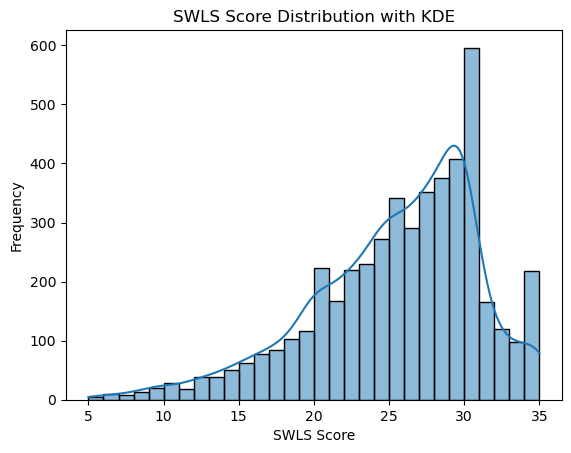

In [59]:
sns.histplot(dataset.swls_score, kde=True, bins=30)
plt.xlabel('SWLS Score')
plt.ylabel('Frequency')
plt.title('SWLS Score Distribution with KDE')
plt.show()

## Feature Selection

In [60]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler

X = dataset.drop(columns=['swls_score', 'nomem_encr'])
y = dataset['swls_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RFECV with Gradient Boosting
print("Using RFECV to determine the optimal number of features for Gradient Boosting...")
gb_model = GradientBoostingRegressor(random_state=42)
rfecv = RFECV(estimator=gb_model, step=10, cv=5, scoring='r2')
rfecv.fit(X_train, y_train)

optimal_features = rfecv.n_features_
print(f"Optimal number of features determined by RFECV: {optimal_features}")

methods = {
    "F-Test": lambda X, y: SelectKBest(score_func=f_regression, k=20).fit(X, y).get_support(),
    "Lasso": lambda X, y: LassoCV(cv=5, random_state=42).fit(X, y).coef_ != 0,
    "Random Forest": lambda X, y: RandomForestRegressor(random_state=42).fit(X, y).feature_importances_ > np.mean(RandomForestRegressor(random_state=42).fit(X, y).feature_importances_),
    "Gradient Boosting": lambda X, y: GradientBoostingRegressor(random_state=42).fit(X, y).feature_importances_ > np.mean(GradientBoostingRegressor(random_state=42).fit(X, y).feature_importances_),
    "RFE (Linear Regression)": lambda X, y: RFE(estimator=LinearRegression(), 
                                                n_features_to_select=optimal_features, step=10).fit(X, y).support_,
    "RFE (Lasso Regression)": lambda X, y: RFE(estimator=LassoCV(cv=5, random_state=42), 
                                               n_features_to_select=optimal_features, step=10).fit(X, y).support_,
    "RFE (Random Forest)": lambda X, y: RFE(estimator=RandomForestRegressor(random_state=42), 
                                            n_features_to_select=optimal_features, step=10).fit(X, y).support_,
    "RFE (Gradient Boosting)": lambda X, y: RFE(estimator=GradientBoostingRegressor(random_state=42), 
                                                n_features_to_select=optimal_features, step=10).fit(X, y).support_,
}

results = []
for method_name, method_func in methods.items():
    selected = method_func(X_train, y_train)
    selected_features = X_train.columns[selected]
    
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train[selected_features], y_train)
    y_test_pred = model.predict(X_test[selected_features])
    
    r2 = r2_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    results.append((method_name, r2, mae))
    print(f"{method_name} - Validation R²: {r2:.3f}, MAE: {mae:.3f}")

results_df = pd.DataFrame(results, columns=["Method", "Validation R²", "Validation MAE"])
print("\nFeature Selection Methods Performance:")
print(results_df)


Using RFECV to determine the optimal number of features for Gradient Boosting...
Optimal number of features determined by RFECV: 71
F-Test - Validation R²: 0.400, MAE: 3.383
Lasso - Validation R²: 0.417, MAE: 3.333
Random Forest - Validation R²: 0.409, MAE: 3.365
Gradient Boosting - Validation R²: 0.406, MAE: 3.373
RFE (Linear Regression) - Validation R²: 0.415, MAE: 3.340
RFE (Lasso Regression) - Validation R²: 0.416, MAE: 3.331
RFE (Random Forest) - Validation R²: 0.407, MAE: 3.372
RFE (Gradient Boosting) - Validation R²: 0.427, MAE: 3.314

Feature Selection Methods Performance:
                    Method  Validation R²  Validation MAE
0                   F-Test       0.400052        3.383209
1                    Lasso       0.417201        3.333409
2            Random Forest       0.408948        3.365145
3        Gradient Boosting       0.405813        3.372669
4  RFE (Linear Regression)       0.414903        3.339662
5   RFE (Lasso Regression)       0.415527        3.331435
6     

## Get Selected features

In [61]:
# **Selected features from previous step**
selected_features = X_train.columns[rfecv.support_]
print(selected_features)

# **Filter the dataset to the selected features**
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

Index(['extraversion', 'agreeableness', 'conscientiousness',
       'emotional_stability', 'intellect_imagination',
       'leisure_time_satisfaction', 'cabaret', 'opera', 'musical',
       'house_party', 'museum', 'art_gallery', 'cinema', 'food_event',
       'theme_park', 'holiday_within_the_Netherlands', 'holiday_abroad',
       'sports_hours', 'tv_time', 'podcast_time', 'audiobooks', 'books',
       'handicrafts', 'handwork', 'watching_at_home', 'equestrian_sport',
       'dining_out', 'music_radio', 'fishing', 'email',
       'searching_information', 'comparing_products', 'purchasing',
       'watching_online', 'downloading', 'gaming', 'reading_online',
       'other_online_activities', 'social_media_hours', 'chatting_hours',
       'forum_hours', 'social_contacts_satisfaction', 'emptiness',
       'people_to_fully_rely_on', 'closely_connected_people',
       'miss_having_people_around', 'feel_deserted', 'family_day',
       'neighborhood_day', 'others_day', 'family_evening', 'oth

## Gradient Boosting with Hyperparameter Tuning and Feature Selection

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedKFold
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
import numpy as np

estimator = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None] 
}

# Hyperparameter tuning with GridSearchCV
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)
grid_search = GridSearchCV(estimator, param_grid, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
grid_search.fit(X_train_selected, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)


Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [20]:

best_estimator = GradientBoostingRegressor(**best_params, random_state=42)
best_estimator.fit(X_train_selected, y_train)

# Train set evaluation
train_r2 = r2_score(y_train, best_estimator.predict(X_train_selected))
train_mae = mean_absolute_error(y_train, best_estimator.predict(X_train_selected))
train_rmse = root_mean_squared_error(y_train, best_estimator.predict(X_train_selected))

# Test set evaluation
test_r2 = r2_score(y_test, best_estimator.predict(X_test_selected))
test_mae = mean_absolute_error(y_test, best_estimator.predict(X_test_selected))
test_rmse = root_mean_squared_error(y_test, best_estimator.predict(X_test_selected))

print("\nGridSearchCV results:")
print(f"Best mean cross-validation R² score: {grid_search.best_score_}")

print("\nTraining R² Score:", train_r2)
print("Training MAE Score:", train_mae)
print("Training RMSE Score:", train_rmse)

print("\nTest R² Score:", test_r2)
print("Test MAE Score:", test_mae)
print("Test RMSE Score:", test_rmse)


GridSearchCV results:
Best mean cross-validation R² score: 0.4178345235569151

Training R² Score: 0.5482988626438889
Training MAE Score: 2.873880725473412
Training RMSE Score: 3.725470795361216

Test R² Score: 0.4368783871981827
Test MAE Score: 3.2643273556490167
Test RMSE Score: 4.299341588313609


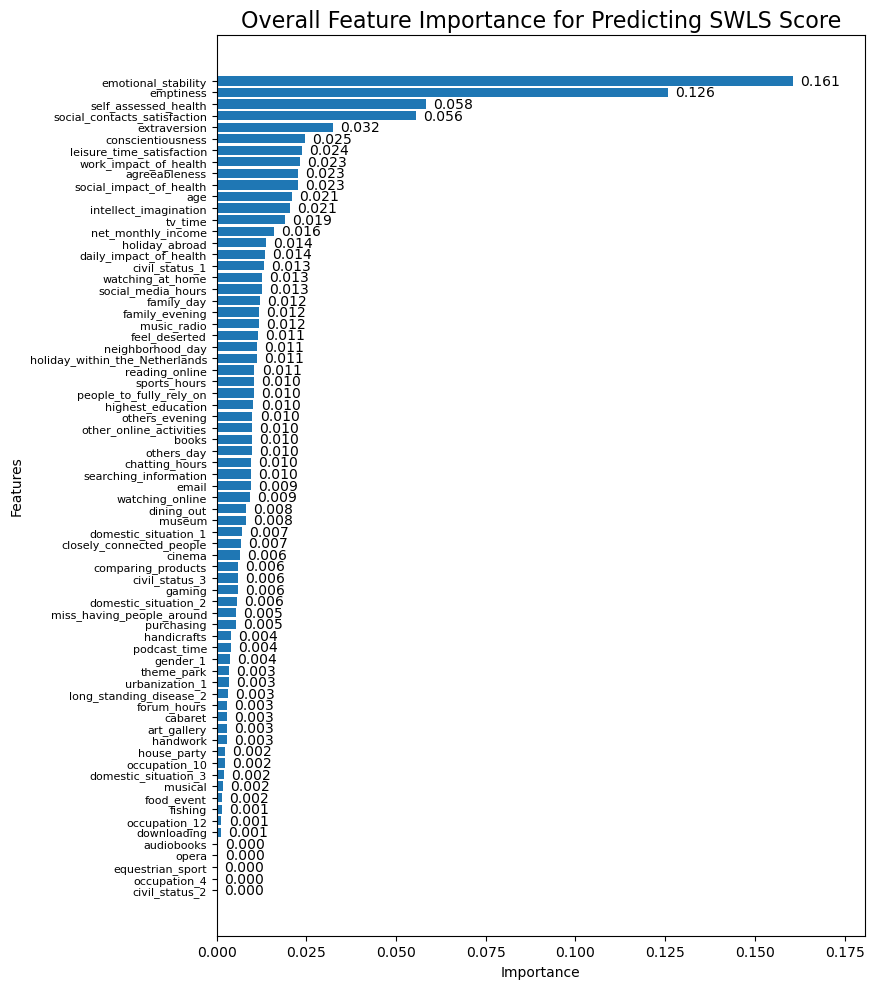

In [46]:
plt.figure(figsize=(9, 10))  

plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')

for index, value in enumerate(importance_df['Importance']):
    plt.text(value + 0.002, index, f'{value:.3f}', va='center', fontsize=10)  

plt.gca().invert_yaxis()

plt.xlabel('Importance', fontsize=10)
plt.ylabel('Features', fontsize=10)
plt.title('Overall Feature Importance for Predicting SWLS Score', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)  

plt.tight_layout()
plt.xlim(0, max(importance_df['Importance']) + 0.02)
plt.show()

## Random Forest with Hyperparameter Tuning:

In [21]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

estimator = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  
}

# Hyperparameter tuning with GridSearchCV 
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)
grid_search = GridSearchCV(estimator, param_grid, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
grid_search.fit(X_train_selected, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

best_estimator = RandomForestRegressor(**best_params, random_state=42)
best_estimator.fit(X_train_selected, y_train)

# Train set evaluation
train_r2 = r2_score(y_train, best_estimator.predict(X_train_selected))
train_mae = mean_absolute_error(y_train, best_estimator.predict(X_train_selected))
train_rmse = root_mean_squared_error(y_train, best_estimator.predict(X_train_selected))

# Test set evaluation
test_r2 = r2_score(y_test, best_estimator.predict(X_test_selected))
test_mae = mean_absolute_error(y_test, best_estimator.predict(X_test_selected))
test_rmse = root_mean_squared_error(y_test, best_estimator.predict(X_test_selected))

cv_results = grid_search.cv_results_
print("\nGridSearchCV results:")
print(f"Best mean cross-validation R² score: {grid_search.best_score_}")

print("\nTraining R² Score:", train_r2)
print("Training MAE Score:", train_mae)
print("Training RMSE Score:", train_rmse)

print("\nTest R² Score:", test_r2)
print("Test MAE Score:", test_mae)
print("Test RMSE Score:", test_rmse)

Best parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}

GridSearchCV results:
Best mean cross-validation R² score: 0.38887366902015713

Training R² Score: 0.8130675258742063
Training MAE Score: 1.7647859623436224
Training RMSE Score: 2.3966132068577326

Test R² Score: 0.4018245476527512
Test MAE Score: 3.3688571211353042
Test RMSE Score: 4.431136688870312


## LASSO Regression with Hyperparameter Tuning

In [22]:
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

lasso = Lasso(random_state=42)

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]  
}

# Hyperparameter tuning with GridSearch
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)
grid_search = GridSearchCV(lasso, param_grid, scoring='r2', cv=cv, n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

best_lasso = Lasso(alpha=best_alpha, random_state=42)

r2_scores = cross_val_score(best_lasso, X_train_selected, y_train, cv=cv, scoring='r2')
mae_scores = cross_val_score(best_lasso, X_train_selected, y_train, cv=cv, scoring='neg_mean_absolute_error')
rmse_scores = cross_val_score(best_lasso, X_train_selected, y_train, cv=cv, scoring='neg_root_mean_squared_error')

print("Cross-validation R² scores:", r2_scores)
print("Mean cross-validation R² score:", np.mean(r2_scores))

print("Cross-validation MAE scores:", -mae_scores) 
print("Mean cross-validation MAE score:", -np.mean(mae_scores))

print("Cross-validation RMSE scores:", -rmse_scores)  
print("Mean cross-validation RMSE score:", -np.mean(rmse_scores))

best_lasso.fit(X_train_selected, y_train)

# Train set evaluation
train_r2 = r2_score(y_train, best_lasso.predict(X_train_selected))
train_mae = mean_absolute_error(y_train, best_lasso.predict(X_train_selected))
train_rmse = root_mean_squared_error(y_train, best_lasso.predict(X_train_selected))

# Test set evaluation
test_r2 = r2_score(y_test, best_lasso.predict(X_test_selected))
test_mae = mean_absolute_error(y_test, best_lasso.predict(X_test_selected))
test_rmse = root_mean_squared_error(y_test, best_lasso.predict(X_test_selected))  

print("\nTraining R² Score:", train_r2)
print("Training MAE Score:", train_mae)
print("Training RMSE Score:", train_rmse)

print("\nTest R² Score:", test_r2)
print("Test MAE Score:", test_mae)
print("Test RMSE Score:", test_rmse)


Best alpha: 0.01
Cross-validation R² scores: [0.38415178 0.43806804 0.38588645 0.38034623 0.3978546  0.45559022
 0.41743525 0.38606162 0.34406956 0.36913609 0.43666347 0.38127007
 0.37801458 0.39844851 0.36794469 0.39519321 0.41089566 0.38452247
 0.4095853  0.3812409  0.43184909 0.38945581 0.38320981 0.37212031
 0.38548392]
Mean cross-validation R² score: 0.3945799056375061
Cross-validation MAE scores: [3.29191087 3.31922243 3.26441555 3.39081463 3.31350628 3.15822399
 3.30956182 3.29104978 3.36625792 3.49739394 3.22672838 3.30357463
 3.23080571 3.48575225 3.402408   3.27043622 3.39019596 3.3573792
 3.36889366 3.22872762 3.24015961 3.23393748 3.30845709 3.5107926
 3.3708743 ]
Mean cross-validation MAE score: 3.325259197219595
Cross-validation RMSE scores: [4.35722853 4.22318049 4.27835754 4.36927362 4.2729963  4.11295719
 4.32911494 4.28332543 4.31980524 4.49670642 4.18830337 4.23478184
 4.17995836 4.49571689 4.46009645 4.25110663 4.3226859  4.31928299
 4.37331401 4.25067995 4.18881363

## Multiple Linear Regression

In [62]:
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

estimator = LinearRegression()

# Repeated Cross Validation
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

r2_scores = cross_val_score(estimator, X_train_selected, y_train, cv=cv, scoring='r2')
mae_scores = cross_val_score(estimator, X_train_selected, y_train, cv=cv, scoring='neg_mean_absolute_error')
rmse_scores = cross_val_score(estimator, X_train_selected, y_train, cv=cv, scoring='neg_root_mean_squared_error')

print("Cross-validation R² scores:", r2_scores)
print("Mean cross-validation R² score:", np.mean(r2_scores))

print("Cross-validation MAE scores:", -mae_scores) 
print("Mean cross-validation MAE score:", -np.mean(mae_scores))

print("Cross-validation RMSE scores:", -rmse_scores) 
print("Mean cross-validation RMSE score:", -np.mean(rmse_scores))


estimator.fit(X_train_selected, y_train)

# Train set evaluation
train_r2 = r2_score(y_train, estimator.predict(X_train_selected))
train_mae = mean_absolute_error(y_train, estimator.predict(X_train_selected))
train_rmse = root_mean_squared_error(y_train, estimator.predict(X_train_selected))

# Test set evaluation
test_r2 = r2_score(y_test, estimator.predict(X_test_selected))
test_mae = mean_absolute_error(y_test, estimator.predict(X_test_selected))
test_rmse = root_mean_squared_error(y_test, estimator.predict(X_test_selected))

print("\nTraining R² Score:", train_r2)
print("Training MAE Score:", train_mae)
print("Training RMSE Score:", train_rmse)

print("\nTest R² Score:", test_r2)
print("Test MAE Score:", test_mae)
print("Test RMSE Score:", test_rmse)


Cross-validation R² scores: [0.3834     0.43297717 0.38512663 0.38002527 0.39685843 0.45551402
 0.42024503 0.3830915  0.33918999 0.36825069 0.43104637 0.38119524
 0.37134938 0.4009565  0.36302712 0.3902735  0.40727652 0.38109133
 0.41133194 0.38045183 0.4310698  0.38879833 0.38269032 0.37238235
 0.37999519]
Mean cross-validation R² score: 0.3927045769385167
Cross-validation MAE scores: [3.29222353 3.33374289 3.25680015 3.39283541 3.31769668 3.15037226
 3.30491538 3.29864516 3.37997793 3.49747946 3.23136976 3.30007126
 3.24149478 3.48513086 3.41594335 3.28598062 3.39802054 3.35279917
 3.36869506 3.22923131 3.24540982 3.23616565 3.30915228 3.50817172
 3.37293293]
Mean cross-validation MAE score: 3.328210318022119
Cross-validation RMSE scores: [4.35988723 4.2422675  4.28100347 4.37040507 4.27652939 4.11324506
 4.31866238 4.2936739  4.33584333 4.49986082 4.20913262 4.23503789
 4.2022949  4.48633534 4.47741324 4.26836161 4.33594372 4.33130574
 4.36684039 4.25338943 4.19168536 4.18633082 4.3